In [22]:
from pathlib import Path

import nilearn
from nilearn.plotting import plot_design_matrix
from nilearn.glm.first_level import first_level_from_bids

import nibabel as nib

import matplotlib.pyplot as plt
%matplotlib inline

# Local import
from utils import load_prep_events, load_prep_confounds, fit_first_level_subject

#### Obtain FirstLevelModels

In [2]:
bids_dir = Path("/work/816119/InSpePosNegData/BIDS_2023E")
subject = "0116"

In [6]:
flm = fit_first_level_subject(subject, bids_dir, runs=[2,4,6]) 

Computing run 1 out of 3 runs (go take a coffee, a big one)
/work/807746/daniels_folder/portfolio4_group1/env/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:114: FutureWarning: The provided callable <function sum at 0x7fe8cc1f3d00> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg(STRATEGY)
Computing run 2 out of 3 runs (70 seconds remaining)
/work/807746/daniels_folder/portfolio4_group1/env/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:114: FutureWarning: The provided callable <function sum at 0x7fe8cc1f3d00> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg(STRATEGY)
/work/807746/daniels_folder/portfolio4_group1/env/lib/python3.10/site-packages/nilearn/glm/first_level/firs

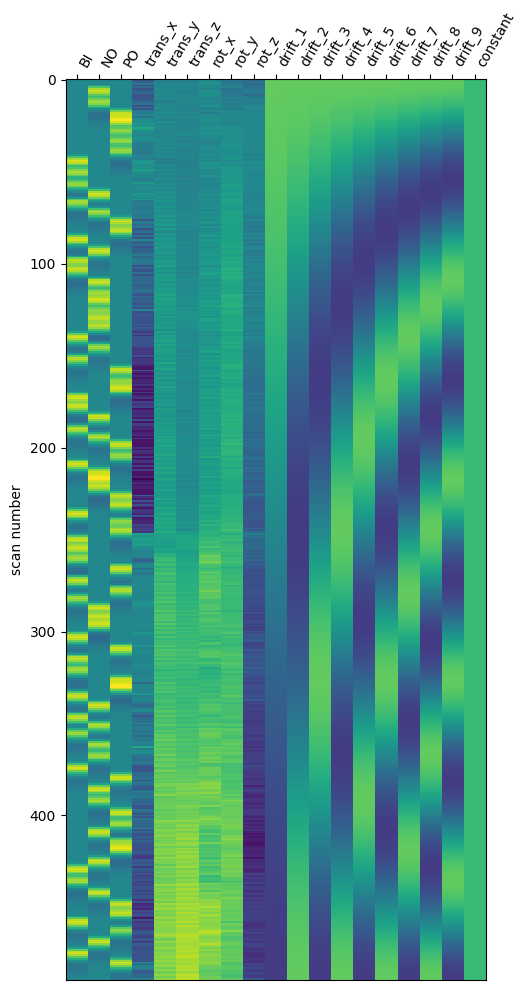

In [7]:
# plot the design matrix
design_matrix = flm.design_matrices_[0]
plot_design_matrix(design_matrix)
plt.show()

In [24]:
# what is TR?
fprep_func_path  = bids_dir / "derivatives" / f"sub-{subject}" / "func" / f"sub-{subject}_task-boldinnerspeech_run-1_echo-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
int(nib.load(fprep_func_path).header['pixdim'][4])

1

In [21]:
design_matrix.shape

(490, 19)

#### Look at the events... someting is not right

In [10]:
bids_func_dir  = bids_dir / f"sub-{subject}" / "func"
runs = [1,2,3,4,5,6]

event_paths = [bids_func_dir / f"sub-{subject}_task-boldinnerspeech_run-{run}_events.tsv" for run in runs]
events = [load_prep_events(path) for path in event_paths]

In [29]:
events[4]

onset  duration trial_type
0     0.988702  0.688119         BI
1     7.293901  0.699955         PS
2    13.610894  0.700338         NS
3    18.927879  0.700038         BI
4    24.244739  0.699686         BI
..         ...       ...        ...
85  454.916128  0.700570         NS
86  459.233674  0.699222         BI
87  463.549753  0.700101         BI
88  467.867194  0.699526         PS
89  474.183651  0.699979         BI

[90 rows x 3 columns]